In [1]:
import seaborn as sbn
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import cPickle as pickle
import os

In [2]:
path_in = r".\output"
path_out = r".\output"

In [564]:
B = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced1.p"), "r" ) )
U = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced1.p"), "r" ) )
B5 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_balanced_5.p"), "r" ) )
U5 = pickle.load( open(os.path.join(path_in,"variable_combinations_results_unbalanced_5.p"), "r" ) )

0
1
2


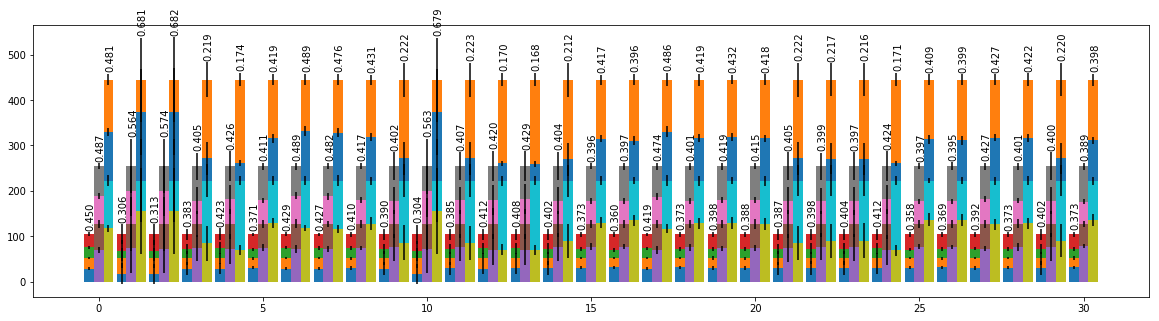

In [279]:
plt.close()
fig,ax = plt.subplots(figsize=(20,5))

B_or_U=B
list_of_feature_groups=Features()
list_of_dependent_variables=[0,1,2]

for dependent in list_of_dependent_variables:
    print dependent
    tn_m=[]
    tn_s=[]
    fp_m=[]
    fp_s=[]
    fn_m=[]
    fn_s=[]
    tp_m=[]
    tp_s=[]
    for feature_group in list_of_feature_groups:
        tn=[]
        fp=[]
        fn=[]
        tp=[]
        for result in B_or_U[(dependent,feature_group)]:
            tn.append(result[3][0])
            fp.append(result[3][1])
            fn.append(result[3][2])
            tp.append(result[3][3])
            
        tn_m.append(np.mean(tn))
        tn_s.append(np.std(tn))
        fp_m.append(np.mean(fp))
        fp_s.append(np.std(fp))
        fn_m.append(np.mean(fn))
        fn_s.append(np.std(fn))
        tp_m.append(np.mean(tp))
        tp_s.append(np.std(tp))
        
    ind = np.arange(len(tn_m))
    col_index = dependent+1
    width = 0.3
    tn = ax.bar(ind+((col_index-2)*width),tn_m,width,yerr=tn_s)
    fp = ax.bar(ind+((col_index-2)*width),fp_m,width,bottom = tn_m,yerr=fp_s)
    fn = ax.bar(ind+((col_index-2)*width),fn_m,width,bottom = [sum(x) for x in zip(*(tn_m,fp_m))],yerr=fn_s)
    tp = ax.bar(ind+((col_index-2)*width),tp_m,width,bottom = [sum(x) for x in zip(*(tn_m,fp_m,fn_m))],yerr=tp_s)
    
    zip_all = zip(*(tn_m,fp_m,fn_m,tp_m))
    fn_part = [x/y for x,y in zip(*(fn_m,[sum(x) for x in zip(*(tp_m,fn_m))])) ]
    max_mean = [sum(x) for x in zip_all]
    
    for i, v in enumerate(max_mean):
        ax.text(i+((col_index-1.85)*width),v+tp_s[i]+50,"%.3f"%fn_part[i], rotation=90,ha="center")
plt.show()

dat zijn wel erg veel regenboogkleurige bars. misschien kan ik het terugbrengen tot alleen de noodzakelijke bars?

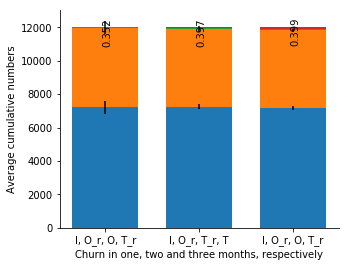

In [593]:
plt.close()
fig,ax = plt.subplots(figsize=(5,4))

B_or_U=U
list_of_feature_groups=[]
list_of_dependent_variables=[0,1,2]

tn_m=[]
tn_s=[]
fp_m=[]
fp_s=[]
fn_m=[]
fn_s=[]
tp_m=[]
tp_s=[]

for dependent in list_of_dependent_variables:   
    feature_group = ((3,11),(13,14),(9,10,12),(4,5,8)) if dependent == 1 else ((3,11),(13,14),(6,7),(9,10,12))
    list_of_feature_groups.append(feature_group)
    
    tn=[]
    fp=[]
    fn=[]
    tp=[]
    for result in B_or_U[(dependent,feature_group)]:
        tn.append(result[3][0])
        fp.append(result[3][1])
        fn.append(result[3][2])
        tp.append(result[3][3])

    tn_m.append(np.mean(tn))
    tn_s.append(np.std(tn))
    fp_m.append(np.mean(fp))
    fp_s.append(np.std(fp))
    fn_m.append(np.mean(fn))
    fn_s.append(np.std(fn))
    tp_m.append(np.mean(tp))
    tp_s.append(np.std(tp))
            
    ind = np.arange(len(tn_m))
    width = 0.7

tn = ax.bar(ind,tn_m,width,yerr=tn_s)
fp = ax.bar(ind,fp_m,width,bottom = tn_m,yerr=fp_s)
fn = ax.bar(ind,fn_m,width,bottom = [sum(x) for x in zip(*(tn_m,fp_m))],yerr=fn_s)
tp = ax.bar(ind,tp_m,width,bottom = [sum(x) for x in zip(*(tn_m,fp_m,fn_m))],yerr=tp_s)

zip_all = zip(*(tn_m,fp_m,fn_m,tp_m))
fn_part = [x/y for x,y in zip(*(fn_m,[sum(x) for x in zip(*(tp_m,fn_m))])) ]
max_mean = [sum(x) for x in zip_all]

for i, v in enumerate(max_mean):
    ax.text(i+0.02,v+tp_s[i]+50,"%.3f"%fn_part[i], rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0,500)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in Readable(list_of_feature_groups)],rotation=0)
ax.set_xlabel("Churn in one, two and three months, respectively")
ax.set_ylabel("Average cumulative numbers")
#ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")
plt.show()

In [595]:
print zip(tn_m,fp_m,fn_m,fp_m)
print tn_m
totals = [sum(x) for x in zip(tn_m,fp_m,fn_m,tp_m)]
print totals

[(7207.3, 4778.7, 18.3, 4778.7), (7258.4, 4652.5, 50.5, 4652.5), (7168.4, 4647.1, 88.8, 4647.1)]
[7207.3, 7258.4, 7168.4]
[12038.0, 12038.0, 12038.0]


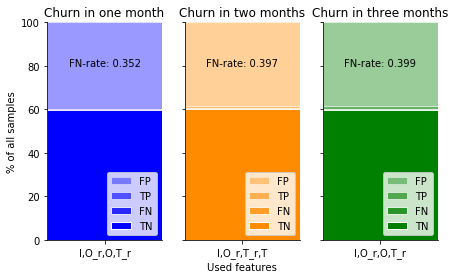

In [616]:
tn_r = [x/y*100 for x,y in zip(tn_m,totals)]
fp_r = [x/y*100 for x,y in zip(fp_m,totals)]
fn_r = [x/y*100 for x,y in zip(fn_m,totals)]
tp_r = [x/y*100 for x,y in zip(tp_m,totals)]

f, axs = plt.subplots(1, 3, sharey=True,figsize=(7,4))
ind=[0]
colors = ['blue', 'darkorange', 'green']
titles = ['Churn in one month','Churn in two months','Churn in three months']
labels = [['I,O_r,O,T_r'],['I,O_r,T_r,T'],['I,O_r,O,T_r']]
fn_part = [x/y for x,y in zip(*(fn_r,[sum(x) for x in zip(*(tp_r,fn_r))])) ]
width=1

for i in range(len(axs)):
    alpha = 1
    axs[i].bar(ind,tn_m[i]/totals[i]*100,width=width,color = colors[i],edgecolor='w', alpha = alpha,label="TN")
    axs[i].bar(ind,fn_m[i]/totals[i]*100,width,bottom = tn_m[i]/totals[i]*100,color = colors[i],edgecolor='w', alpha = alpha-0.2,label="FN")
    axs[i].bar(ind,tp_m[i]/totals[i]*100,width,bottom = [sum(x) for x in zip(*(tn_m,fn_m))][i]/totals[i]*100,color = colors[i],edgecolor='w', alpha = alpha-0.4,label="TP")
    axs[i].bar(ind,fp_m[i]/totals[i]*100,width,bottom = [sum(x) for x in zip(*(tn_m,fn_m,tp_m))][i]/totals[i]*100,color = colors[i],edgecolor='w', alpha = alpha-0.6,label="FP")
    axs[i].set_ylim(0,100)
    axs[0].set_ylabel('% of all samples')
    axs[i].set_xlim(-0.5,.5)
    axs[i].set_xticks([0])
    axs[1].set_xlabel('Used features')
    axs[i].set_xticklabels(labels[i])
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    h, l = axs[i].get_legend_handles_labels()
    axs[i].legend(h[::-1], l[::-1],loc="lower right")
    axs[i].text(0,80,"FN-rate: %.3f"%fn_part[i], rotation=0,ha="center")
    axs[i].set_title(titles[i])
plt.savefig(os.path.join(path_out,"cm_best_unbalanced_out.png"),bbox_inches='tight')
plt.show()

In [619]:
print fn_part
print [1-x for x in fn_part]

[0.3519230769230769, 0.39732494099134547, 0.3991011235955056]
[0.6480769230769231, 0.6026750590086545, 0.6008988764044945]


In [559]:
D = {(3,11): "I", # inactivity
     (4,5,8): "T", # textual
     (6,7): "O", # opinion
     (13,14): "O_r", # opinion 'back'
     (9,10,12): "T_r"} # textual 'back'

def Features():
    iset = set()
    for dependent, independent in B.keys():
        iset.add(independent)
    ilist = list(iset)
    ilist = sorted(ilist,key= lambda x: (len(x),x[0][0]))

    return ilist

def Readable(list_of_feature_groups):
    readable_feature_groups=[]
    for group in list_of_feature_groups:
        G = []
        for features in group:
            G.append(D[features])
        readable_feature_groups.append(G)
    return readable_feature_groups

def Select(groups_list, selection=None):
    groups = []
    if selection == None:
        return groups_list
    elif type(selection)==tuple:
        Include = set([s for s in selection])
        print Include # all groups that include this feature group are selected
    elif selection == "retro":
        Omit = set(((4,5,8),(6,7)))
        print Omit # all groups that include these feature groups are omitted
    elif selection == "static":
        Omit = set(((13,14),(9,10,12)))

    for group in groups_list:
        if type(selection)==tuple:
            if len(set(group).intersection(Include)) != 0:
                groups.append(group)
        elif len(set(group).intersection(Omit)) == 0:
                groups.append(group)
    return groups

list_of_feature_groups = Features()
list_of_dependent_variables = [0,1,2]
print Select(list_of_feature_groups,((6,7),))
#print Readable(Select(list_of_feature_groups,(6,7)))

set([(6, 7)])
[((6, 7),), ((3, 11), (6, 7)), ((6, 7), (9, 10, 12)), ((6, 7), (4, 5, 8)), ((13, 14), (6, 7)), ((3, 11), (6, 7), (9, 10, 12)), ((3, 11), (6, 7), (4, 5, 8)), ((3, 11), (13, 14), (6, 7)), ((6, 7), (9, 10, 12), (4, 5, 8)), ((13, 14), (6, 7), (9, 10, 12)), ((13, 14), (6, 7), (4, 5, 8)), ((3, 11), (13, 14), (6, 7), (9, 10, 12)), ((3, 11), (13, 14), (6, 7), (4, 5, 8)), ((3, 11), (6, 7), (9, 10, 12), (4, 5, 8)), ((13, 14), (6, 7), (9, 10, 12), (4, 5, 8)), ((3, 11), (13, 14), (6, 7), (9, 10, 12), (4, 5, 8))]


set([(13, 14), (9, 10, 12)])


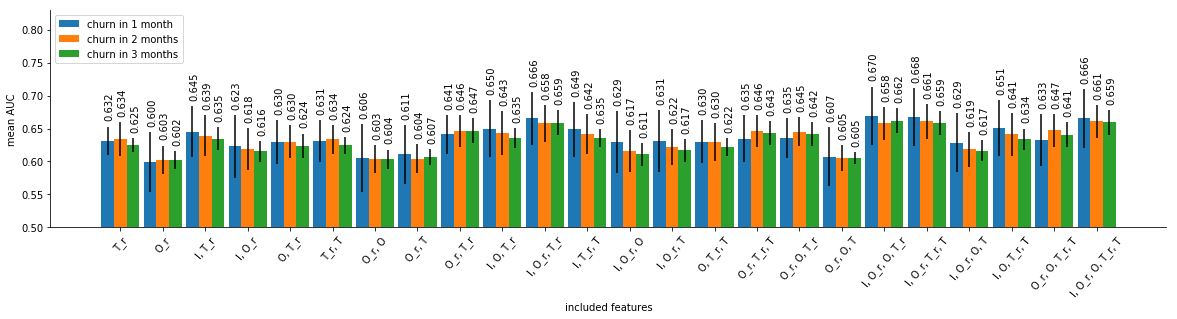

In [562]:
plt.close()
fig,ax = plt.subplots(figsize=(20,4))

B_or_U = U
list_of_feature_groups = Select(Features(),((13,14),(9,10,12)))

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in B_or_U[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    N = len(means)
    ind = np.arange(N)
    col_index = dependent+1
    width = 0.3
    ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
    for i, v in enumerate(means):
        ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.83)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in Readable(list_of_feature_groups)],rotation=50)
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

plt.savefig(os.path.join(path_out,"Unbalanced_Or_new.png"),bbox_inches='tight')
plt.show()

In [50]:
def non_normal(distribution,alpha = 0.05):
    _,p = stats.normaltest(distribution)
    return True if p<alpha else False

In [53]:
def plot_significance_matrix(dataframe,dependent):
    plt.close()
    plt.figure(figsize=(20,20))
    mask = np.zeros_like(dataframe, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    if dependent == 0:
        color = "Blues_r"
    elif dependent == 1:
        color = "Oranges_r"
    else:
        color = "Greens_r"
    cmap = sbn.color_palette(color)
    sbn.heatmap(dataframe, mask=mask, cmap=cmap,square=True,cbar_kws = {"shrink":.5},vmin=0.0,vmax=0.06,annot=True,fmt='.3f')
    plt.xticks(rotation=70)
    plt.savefig(os.path.join(path_out,"unbalanced_significance%s.png" %dependent),bbox_inches='tight')
    plt.show()

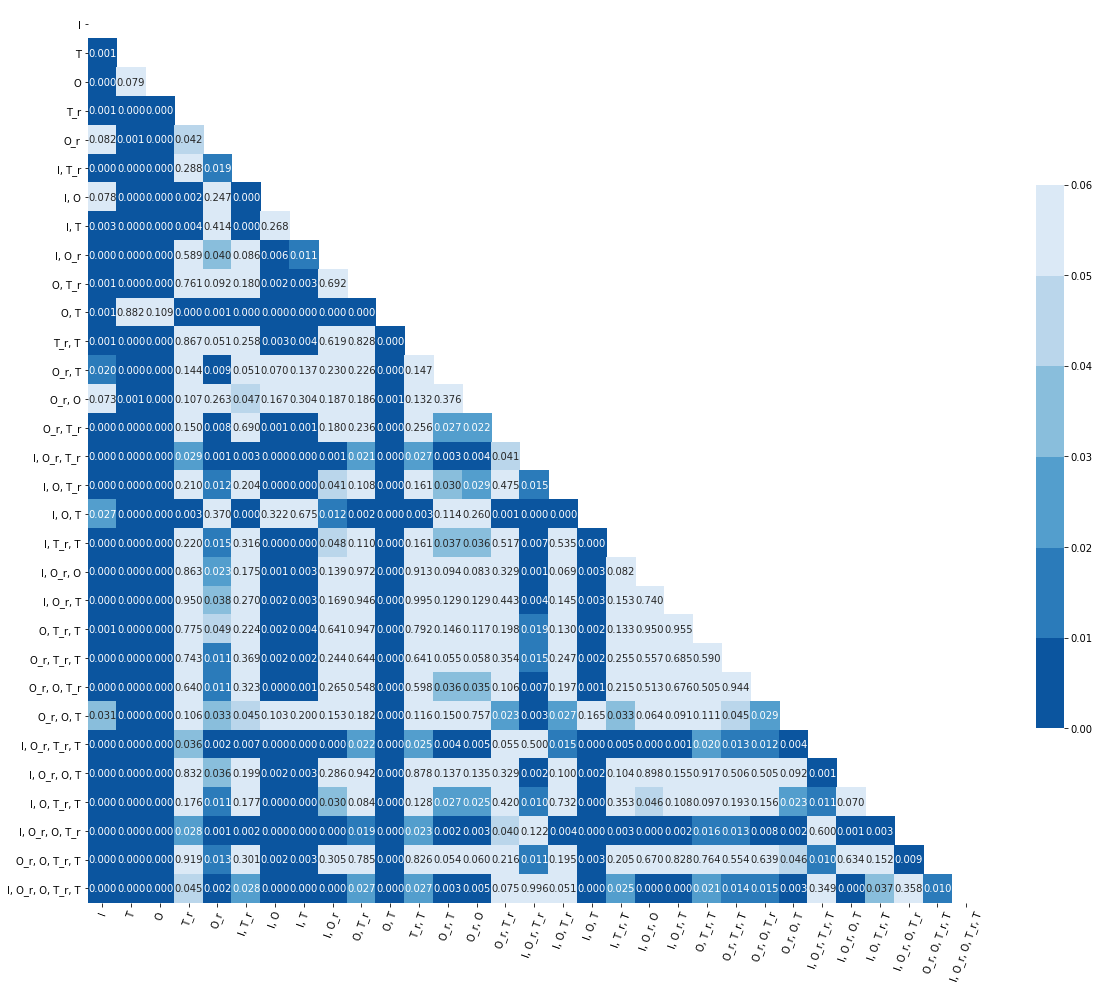

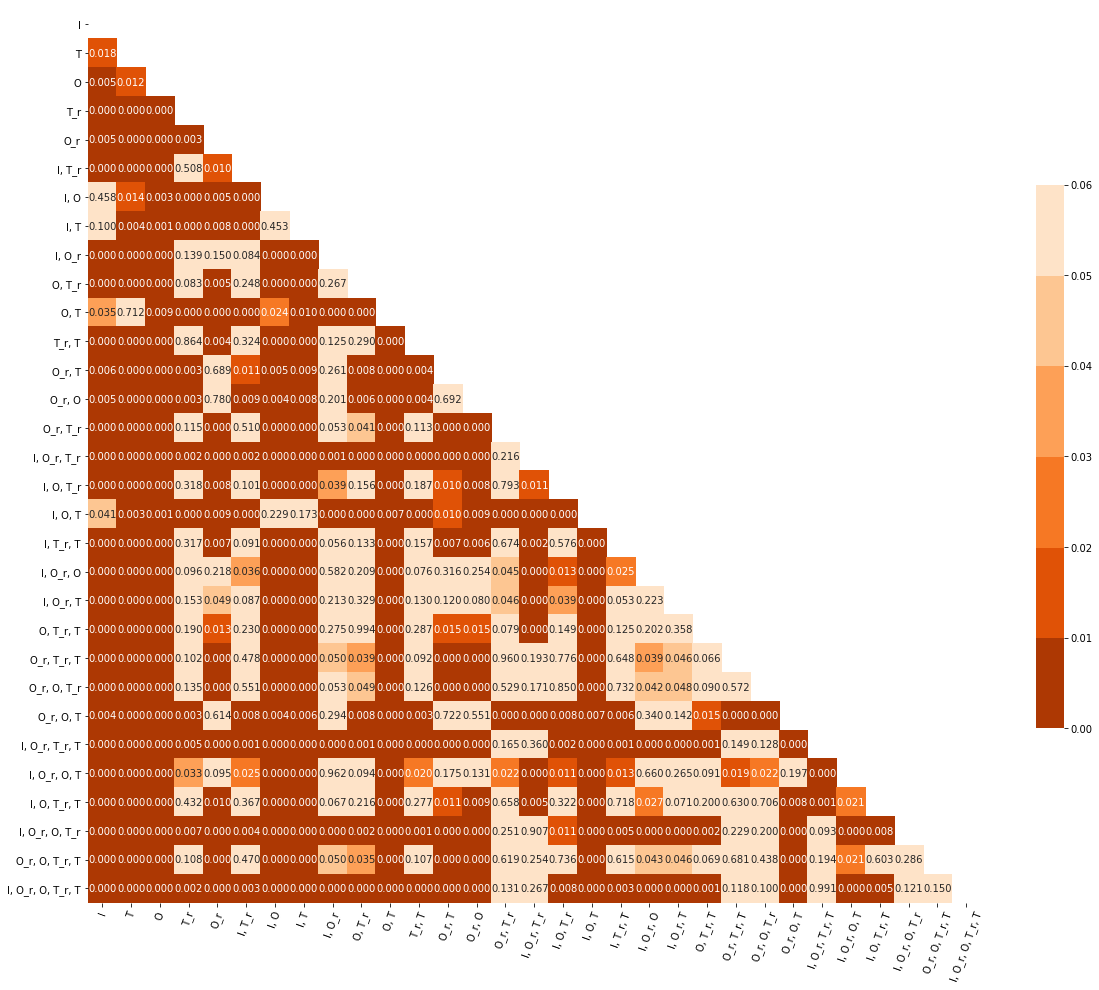

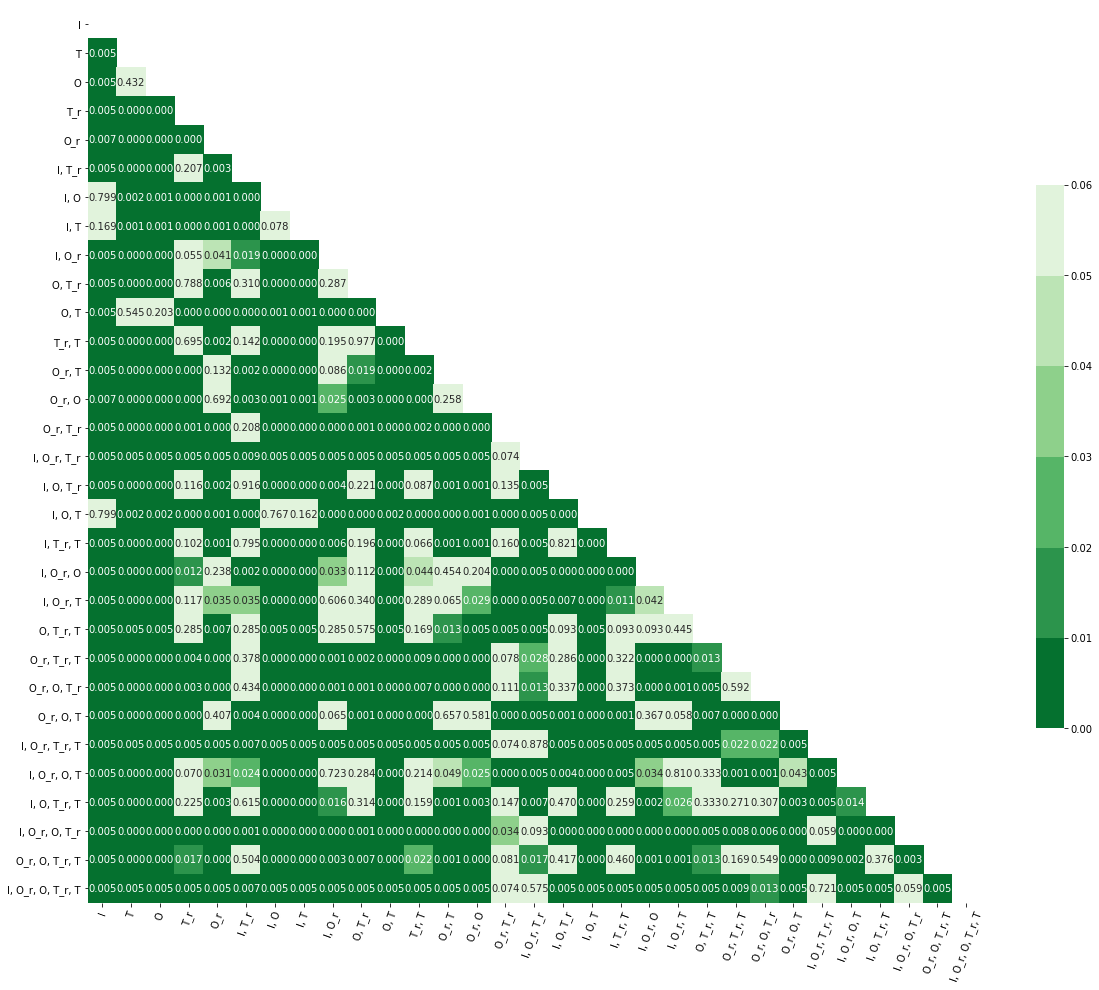

In [54]:
significance_matrix = pd.DataFrame()


list_of_feature_groups = Features()
for dependent in list_of_dependent_variables:
    scores= []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in U[(dependent,feature_group)]:
            auc = result[0]
            auc_scores.append(auc)
        scores.append(auc_scores)
    for t1 in scores:
        c = []
        for t2 in scores:
            r = []
            if non_normal(t1) or non_normal(t2):
                _,r = stats.wilcoxon(t1,t2)
            else:
                _,r = stats.ttest_rel(t1, t2)
            c.append(r)
        col_name = ', '.join(Readable(Features())[scores.index(t1)])
        significance_matrix[col_name]=c
    Di = dict()
    for i,v in enumerate(list(significance_matrix.columns)):
        D[i]=v
    significance_matrix.rename(D,inplace=True)
    plot_significance_matrix(significance_matrix,dependent)

In [111]:
B_or_U = B

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in Features():
        auc_scores = []
        for result in B_or_U[(dependent,feature_group)]:
            auc = result[0]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    print dependent, "%.4f" %np.max(means),means.index(np.max(means))
    print dependent, "%.4f" %np.mean(means), "%.4f" %np.mean(stds)

0 0.6665 25
0 0.6127 0.0500
1 0.6665 30
1 0.6162 0.0338
2 0.6618 15
2 0.6065 0.0248


In [106]:
B_or_U = B

new_matrix = pd.DataFrame()
list_of_feature_groups = Features()
new_matrix["Included features"]= [', '.join(g) for g in Readable(list_of_feature_groups)]

for dependent in list_of_dependent_variables:
    churnvalues = []
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in B_or_U[(dependent,feature_group)]:
            auc = result[0]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    for i in range(len(means)):
        churnvalues.append(r"%.3f $\pm$ %.3f" %(means[i],stds[i]))
    new_matrix[dependent]=churnvalues
print new_matrix

    Included features                  0                  1                  2
0                   I  0.560 $\pm$ 0.035  0.557 $\pm$ 0.048  0.535 $\pm$ 0.026
1                   T  0.520 $\pm$ 0.020  0.519 $\pm$ 0.017  0.509 $\pm$ 0.013
2                   O  0.504 $\pm$ 0.017  0.503 $\pm$ 0.012  0.508 $\pm$ 0.014
3                 T_r  0.623 $\pm$ 0.062  0.638 $\pm$ 0.029  0.625 $\pm$ 0.027
4                 O_r  0.597 $\pm$ 0.071  0.602 $\pm$ 0.021  0.606 $\pm$ 0.025
5              I, T_r  0.645 $\pm$ 0.047  0.640 $\pm$ 0.042  0.627 $\pm$ 0.023
6                I, O  0.576 $\pm$ 0.037  0.562 $\pm$ 0.046  0.538 $\pm$ 0.031
7                I, T  0.580 $\pm$ 0.034  0.567 $\pm$ 0.042  0.537 $\pm$ 0.032
8              I, O_r  0.612 $\pm$ 0.059  0.624 $\pm$ 0.039  0.611 $\pm$ 0.025
9              O, T_r  0.620 $\pm$ 0.069  0.645 $\pm$ 0.035  0.626 $\pm$ 0.024
10               O, T  0.513 $\pm$ 0.020  0.511 $\pm$ 0.023  0.512 $\pm$ 0.008
11             T_r, T  0.629 $\pm$ 0.068  0.644 $\pm

In [107]:
new_matrix.to_csv("meansstdvs_new_B.csv", sep="&",index = False)

hypothesis: 5-fold will perform better than 10-fold, because there are more samples in every fold

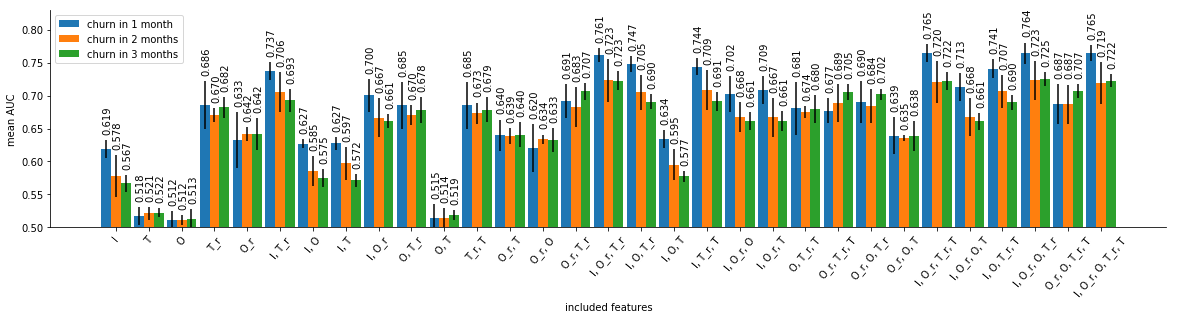

In [587]:
plt.close()
fig,ax = plt.subplots(figsize=(20,4))

B_or_U = B5
list_of_feature_groups = Select(Features())

for dependent in list_of_dependent_variables:
    means = []
    stds = []
    for feature_group in list_of_feature_groups:
        auc_scores = []
        for result in B_or_U[(dependent,feature_group)]:
            auc = result[0]
            settings = result[1]
            auc_scores.append(auc)
        means.append(np.mean(auc_scores))
        stds.append(np.std(auc_scores))
    N = len(means)
    ind = np.arange(N)
    col_index = dependent+1
    width = 0.3
    ax.bar(ind+((col_index-2)*width),means,width,yerr=stds)
    for i, v in enumerate(means):
        ax.text(i+((col_index-1.85)*width),v+stds[i]+0.04,"%.3f"%v, rotation=90,ha="center")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0.5,0.83)
ax.set_xticks(ind)
ax.set_xticklabels([', '.join(group) for group in Readable(list_of_feature_groups)],rotation=50)
ax.set_xlabel("included features")
ax.set_ylabel("mean AUC")
ax.legend(["churn in 1 month", "churn in 2 months", "churn in 3 months"],loc="upper left")

#plt.savefig(os.path.join(path_out,"Balanced_new_5.png"),bbox_inches='tight')
plt.show()

HA! hypothese confirmed B-)

In [579]:
B_or_U=U5
list_of_feature_groups=[]
list_of_dependent_variables=[0,1,2]

tn_m=[]
tn_s=[]
fp_m=[]
fp_s=[]
fn_m=[]
fn_s=[]
tp_m=[]
tp_s=[]

for dependent in list_of_dependent_variables:   
    feature_group = ((3,11),(13,14),(9,10,12),(4,5,8)) if dependent == 1 else ((3,11),(13,14),(6,7),(9,10,12))
    list_of_feature_groups.append(feature_group)
    
    tn=[]
    fp=[]
    fn=[]
    tp=[]
    for result in B_or_U[(dependent,feature_group)]:
        tn.append(result[3][0])
        fp.append(result[3][1])
        fn.append(result[3][2])
        tp.append(result[3][3])

    tn_m.append(np.mean(tn))
    tn_s.append(np.std(tn))
    fp_m.append(np.mean(fp))
    fp_s.append(np.std(fp))
    fn_m.append(np.mean(fn))
    fn_s.append(np.std(fn))
    tp_m.append(np.mean(tp))
    tp_s.append(np.std(tp))
            
    ind = np.arange(len(tn_m))
    width = 0.7

zip_all = zip(*(tn_m,fp_m,fn_m,tp_m))
fn_part = [x/y for x,y in zip(*(fn_m,[sum(x) for x in zip(*(tp_m,fn_m))])) ]
max_mean = [sum(x) for x in zip_all]

print zip(tn_m,fp_m,fn_m,fp_m)
print tn_m
totals = [sum(x) for x in zip(tn_m,fp_m,fn_m,tp_m)]
print totals

[(15469.6, 8499.6, 32.2, 8499.6), (15250.4, 8559.6, 92.2, 8559.6), (15311.0, 8317.2, 164.0, 8317.2)]
[15469.6, 15250.4, 15311.0]
[24075.0, 24075.0, 24075.0]


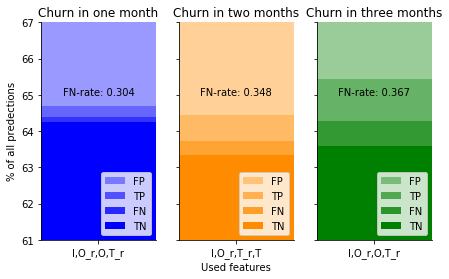

In [592]:
tn_r = [x/y*100 for x,y in zip(tn_m,totals)]
fp_r = [x/y*100 for x,y in zip(fp_m,totals)]
fn_r = [x/y*100 for x,y in zip(fn_m,totals)]
tp_r = [x/y*100 for x,y in zip(tp_m,totals)]

f, axs = plt.subplots(1, 3, sharey=True,figsize=(7,4))
ind=[0]
colors = ['blue', 'darkorange', 'green']
titles = ['Churn in one month','Churn in two months','Churn in three months']
labels = [['I,O_r,O,T_r'],['I,O_r,T_r,T'],['I,O_r,O,T_r']]
fn_part = [x/y for x,y in zip(*(fn_r,[sum(x) for x in zip(*(tp_r,fn_r))])) ]
width=1

for i in range(len(axs)):
    alpha = 1
    axs[i].bar(ind,tn_m[i]/totals[i]*100,width=width,color = colors[i], alpha = alpha,label="TN")
    axs[i].bar(ind,fn_m[i]/totals[i]*100,width,bottom = tn_m[i]/totals[i]*100,color = colors[i], alpha = alpha-0.2,label="FN")
    axs[i].bar(ind,tp_m[i]/totals[i]*100,width,bottom = [sum(x) for x in zip(*(tn_m,fn_m))][i]/totals[i]*100,color = colors[i], alpha = alpha-0.4,label="TP")
    axs[i].bar(ind,fp_m[i]/totals[i]*100,width,bottom = [sum(x) for x in zip(*(tn_m,fn_m,tp_m))][i]/totals[i]*100,color = colors[i], alpha = alpha-0.6,label="FP")
    axs[i].set_ylim(61,67)
    axs[0].set_ylabel('% of all predections')
    axs[i].set_xlim(-0.5,.5)
    axs[i].set_xticks([0])
    axs[1].set_xlabel('Used features')
    axs[i].set_xticklabels(labels[i])
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    h, l = axs[i].get_legend_handles_labels()
    axs[i].legend(h[::-1], l[::-1],loc="lower right")
    axs[i].text(0,65,"FN-rate: %.3f"%fn_part[i], rotation=0,ha="center")
    axs[i].set_title(titles[i])
#plt.savefig(os.path.join(path_out,"cm_best_unbalanced_5.png"),bbox_inches='tight')
plt.show()